# Time to Peak

In [1]:
gages:(27#"S";enlist ",") 0:`:data/usgs_gage_subset.csv;
sites:string each gages[`site_no]
sites:{$[7=count x;"0",x;x]}each sites
basin:("S",242#"F";enlist ",") 0:`:data/gages_with_basin_attr.csv
nlcd06:("S",(5#"F"),"SFFSFSFFFFSFSSFSSFFFSFFSFF";enlist ",") 0:`:data/snap_sampled_imp_nlcd_2006.csv 
nlcd11:("S",(5#"F"),"SFFSFSFFFFSFSSFSSFFFSFFSFF";enlist ",") 0:`:data/snap_sampled_imp_nlcd_2011.csv 
nlcd16:("S",(5#"F"),"SFFSFSFFFFSFSSFSSFFFSFFSFF";enlist ",") 0:`:data/snap_sampled_imp_nlcd_2016.csv 

nlcd06:update site_no:`${$[7=count x;"0",x;x]}each string each site_no,year:6 from select
 site_no:SOURCE_FEA,INTPTLAT,INTPTLON,Measure,REACHCODE,distance,imp:imp_nlcd_2006 from nlcd06
nlcd11:update site_no:`${$[7=count x;"0",x;x]}each string each site_no,year:11 from select
 site_no:SOURCE_FEA,INTPTLAT,INTPTLON,Measure,REACHCODE,distance,imp:imp_nlcd_2011 from nlcd11
nlcd16:update site_no:`${$[7=count x;"0",x;x]}each string each site_no,year:16 from select
 site_no:SOURCE_FEA,INTPTLAT,INTPTLON,Measure,REACHCODE,distance,imp:imp_nlcd_2016 from nlcd16
\l ../fdl2019/ml/ml.q
\l ../fdl2019/ml/init.q


In [2]:
\l ../t_p


In [3]:
show peak:select from peak where date>=2009.07.01,site_no in `$sites

date       site_no  lat      lon       start_time              end_time      ..
-----------------------------------------------------------------------------..
2009.07.02 01377500 40.99278 -74.02111 2009.07.02T15:45:00.000 2009.07.02T16:..
2009.07.02 01397000 40.57222 -74.86806 2009.07.02T11:00:00.000 2009.07.02T18:..
2009.07.02 01396500 40.67778 -74.87917 2009.07.02T08:30:00.000 2009.07.02T12:..
2009.07.07 06478500 43.18583 -97.63528 2009.07.07T12:45:00.000 2009.07.23T11:..
2009.07.10 06478690 43.41556 -97.20472 2009.07.10T09:00:00.000 2009.07.11T08:..
2009.07.11 04215000 42.89    -78.64528 2009.07.11T21:45:00.000 2009.07.12T02:..
2009.07.11 04215500 42.82972 -78.77528 2009.07.11T21:15:00.000 2009.07.12T01:..
2009.07.15 06438500 44.52944 -101.9297 2009.07.15T01:00:00.000 2009.07.15T04:..
2009.07.18 06834000 40.35167 -101.1236 2009.07.18T04:00:00.000 2009.07.19T02:..
2009.07.21 01391000 40.99778 -74.11194 2009.07.21T18:45:00.000 2009.07.21T22:..
2009.07.23 02162093 34.02722 -81.04194 2

In [4]:
\cd ..

In [5]:
maxht:("SDF";enlist ",") 0:`:maxht.csv

In [233]:
precipall:-1_raze {flip `site_no`long`lat`elv`date`ppt!flip value each 10_("SFFFDF";enlist ",")0: 
    hsym `$"fdl_floods/data/prism/",string[x]} each key `:fdl_floods/data/prism
precipall:`date xasc delete from precipall where site_no=`
precipall[`site_no]:`${$[7=count x;"0",x;x]}each string each precipall[`site_no]

show precipall_prev:update prev1:prev ppt,prev2:2 xprev ppt,prev3:3 xprev ppt,
 prev4:4 xprev ppt,prev5:5 xprev ppt,prev6:6 xprev ppt,
 prev7:7 xprev ppt,prev8:8 xprev ppt,prev9: 9 xprev ppt,
 prev10:10 xprev ppt,avgppt:60 mavg ppt by site_no from precipall

In [168]:
precipall_fut:update next1:prev reverse ppt,next2:2 xprev reverse ppt,next3:3 xprev reverse ppt,
 next4:4 xprev reverse ppt,next5:5 xprev reverse ppt,next6:6 xprev reverse ppt,
 next7:7 xprev reverse ppt,next8:8 xprev reverse ppt,next9: 9 xprev reverse ppt,
 next10:10 xprev reverse ppt by site_no from precipall_prev

In [169]:
precipall_upst:update pptup1:prev ppt,pptup2:2 xprev ppt by date,catch:2#'string each site_no from precipall_fut

In [170]:
show peak_basin:(peak lj `site_no`date xkey precipall_upst) ij `site_no xkey basin

date       site_no  lat     lon       start_time              end_time       ..
-----------------------------------------------------------------------------..
2009.07.02 01377500 40.9928 -74.02111 2009.07.02T15:45:00.000 2009.07.02T16:1..
2009.07.02 01397000 40.5722 -74.86806 2009.07.02T11:00:00.000 2009.07.02T18:0..
2009.07.02 01396500 40.6778 -74.87917 2009.07.02T08:30:00.000 2009.07.02T12:1..
2009.07.07 06478500 43.1858 -97.63528 2009.07.07T12:45:00.000 2009.07.23T11:4..
2009.07.10 06478690 43.4156 -97.20472 2009.07.10T09:00:00.000 2009.07.11T08:3..
2009.07.11 04215000 42.89   -78.64528 2009.07.11T21:45:00.000 2009.07.12T02:1..
2009.07.11 04215500 42.8297 -78.77528 2009.07.11T21:15:00.000 2009.07.12T01:4..
2009.07.15 06438500 44.5294 -101.9297 2009.07.15T01:00:00.000 2009.07.15T04:0..
2009.07.18 06834000 40.3517 -101.1236 2009.07.18T04:00:00.000 2009.07.19T02:1..
2009.07.21 01391000 40.9978 -74.11194 2009.07.21T18:45:00.000 2009.07.21T22:1..
2009.07.23 02162093 34.0274 -81.04194 20

In [171]:
stryear:{$[x<2011;6;x<2016;11;16]}each `year$peak_basin[`date]

merged:update year:stryear from peak_basin

show peak_bas_imp:merged ij `site_no`year xkey (nlcd06,nlcd11,nlcd16)

date       site_no  lat     lon       start_time              end_time       ..
-----------------------------------------------------------------------------..
2009.07.02 01377500 40.9928 -74.02111 2009.07.02T15:45:00.000 2009.07.02T16:1..
2009.07.02 01397000 40.5722 -74.86806 2009.07.02T11:00:00.000 2009.07.02T18:0..
2009.07.02 01396500 40.6778 -74.87917 2009.07.02T08:30:00.000 2009.07.02T12:1..
2009.07.07 06478500 43.1858 -97.63528 2009.07.07T12:45:00.000 2009.07.23T11:4..
2009.07.10 06478690 43.4156 -97.20472 2009.07.10T09:00:00.000 2009.07.11T08:3..
2009.07.11 04215000 42.89   -78.64528 2009.07.11T21:45:00.000 2009.07.12T02:1..
2009.07.11 04215500 42.8297 -78.77528 2009.07.11T21:15:00.000 2009.07.12T01:4..
2009.07.15 06438500 44.5294 -101.9297 2009.07.15T01:00:00.000 2009.07.15T04:0..
2009.07.18 06834000 40.3517 -101.1236 2009.07.18T04:00:00.000 2009.07.19T02:1..
2009.07.21 01391000 40.9978 -74.11194 2009.07.21T18:45:00.000 2009.07.21T22:1..
2009.07.23 02162093 34.0274 -81.04194 20

In [172]:
show time_peak:update month:`mm$date,sin_t:sin 2*3.14*(`mm$date)%11,
    cos_t:cos 2*3.14*(`mm$date)%11,x:cos[lat]*cos[lon],y:cos[lat]*sin[lon],
    z:sin[lat] from peak_bas_imp

date       site_no  lat     lon       start_time              end_time       ..
-----------------------------------------------------------------------------..
2009.07.02 01377500 40.9928 -74.02111 2009.07.02T15:45:00.000 2009.07.02T16:1..
2009.07.02 01397000 40.5722 -74.86806 2009.07.02T11:00:00.000 2009.07.02T18:0..
2009.07.02 01396500 40.6778 -74.87917 2009.07.02T08:30:00.000 2009.07.02T12:1..
2009.07.07 06478500 43.1858 -97.63528 2009.07.07T12:45:00.000 2009.07.23T11:4..
2009.07.10 06478690 43.4156 -97.20472 2009.07.10T09:00:00.000 2009.07.11T08:3..
2009.07.11 04215000 42.89   -78.64528 2009.07.11T21:45:00.000 2009.07.12T02:1..
2009.07.11 04215500 42.8297 -78.77528 2009.07.11T21:15:00.000 2009.07.12T01:4..
2009.07.15 06438500 44.5294 -101.9297 2009.07.15T01:00:00.000 2009.07.15T04:0..
2009.07.18 06834000 40.3517 -101.1236 2009.07.18T04:00:00.000 2009.07.19T02:1..
2009.07.21 01391000 40.9978 -74.11194 2009.07.21T18:45:00.000 2009.07.21T22:1..
2009.07.23 02162093 34.0274 -81.04194 20

In [173]:
time_peak[`delta_peak]:(time_peak[`peak_time]-time_peak[`start_time])*24

In [174]:
upstr:update upst1:prev height,upst2:2 xprev height by date,catch:2#'string each site_no from maxht

In [175]:
time_peak:time_peak ij `site_no`date xkey upstr

In [176]:
fillcol:time_peak

fillcol[`pptup2]:fillcol[`ppt]|'fillcol[`pptup1]|'fillcol[`pptup2]
fillcol[`pptup1]:fillcol[`ppt]|'fillcol[`pptup1]

fillcol[`prev10]:fillcol[`ppt]|'fillcol[`prev1]|'fillcol[`prev2]|'fillcol[`prev3]|'
    fillcol[`prev4]|'fillcol[`prev5]|'
    fillcol[`prev6]|'fillcol[`prev7]|'fillcol[`prev8]|'fillcol[`prev9]|' fillcol[`prev10]

fillcol[`prev9]:fillcol[`ppt]|'fillcol[`prev1]|'fillcol[`prev2]|'fillcol[`prev3]|'
    fillcol[`prev4]|'fillcol[`prev5]|'
    fillcol[`prev6]|'fillcol[`prev7]|'fillcol[`prev8]|'fillcol[`prev9]

fillcol[`prev8]:fillcol[`ppt]|'fillcol[`prev1]|'fillcol[`prev2]|'fillcol[`prev3]|'
    fillcol[`prev4]|'fillcol[`prev5]|'
    fillcol[`prev6]|'fillcol[`prev7]|'fillcol[`prev8]

fillcol[`prev7]:fillcol[`ppt]|'fillcol[`prev1]|'fillcol[`prev2]|'fillcol[`prev3]|'
    fillcol[`prev4]|'fillcol[`prev5]|'
    fillcol[`prev6]|'fillcol[`prev7]

fillcol[`prev6]:fillcol[`ppt]|'fillcol[`prev1]|'fillcol[`prev2]|'fillcol[`prev3]|'
    fillcol[`prev4]|'fillcol[`prev5]|'fillcol[`prev6]

fillcol[`prev5]:fillcol[`ppt]|'fillcol[`prev1]|'fillcol[`prev2]|'fillcol[`prev3]|'
    fillcol[`prev4]|'fillcol[`prev5]

fillcol[`prev4]:fillcol[`ppt]|'fillcol[`prev1]|'fillcol[`prev2]|'fillcol[`prev3]|'fillcol[`prev4]

fillcol[`prev3]:fillcol[`ppt]|'fillcol[`prev1]|'fillcol[`prev2]|'fillcol[`prev3]

fillcol[`prev2]:fillcol[`ppt]|'fillcol[`prev1]|'fillcol[`prev2]

fillcol[`prev1]:fillcol[`ppt]|'fillcol[`prev1]
upstr[`upst2]:upstr[`height]|upstr[`upst1]|upstr[`upst2]
upstr[`upst1]:upstr[`height]|upstr[`upst1]
fillcol:time_peak

In [177]:
\S -5128710
aa:-200?distinct time_peak[`site_no]
bb:distinct time_peak[`site_no] except aa

In [178]:
time_peak[`split]:{$[x in bb;`TEST;`TRAIN]}each time_peak[`site_no]

In [179]:
select count where delta_peak<3.12,count where delta_peak within 3.12 7.44,count where delta_peak 
    within 7.44 18,count where delta_peak>18 from time_peak


x   x1  x2  x3 
---------------
747 720 789 787


In [180]:
time_peak[`target]:{$[x<3.12;0;x within 3.12 7.44;1;x within 7.44 18;2;3]}each time_peak[`delta_peak]

In [180]:
\l gagesdir/gagesdir

[0;31mgagesdir. OS reports: No such file or directory[0m: [0;31mgagesdir. OS reports: No such file or directory[0m

In [181]:
wind_ht_24:raze {[x] 
 dd:x[1];
 si:x[0];
 select wind_2:max 2 mavg height,wind_4:max 4 mavg height,wind_12:max 12 mavg height,wind_48:max 48 mavg height from 
    str where date within ("d"$dd,("d"$dd)+1),si=`$site_no,datetime 
    within (dd,dd+1)}each value each select site_no,start_time from time_peak

In [ ]:
\cd ../../

In [182]:
show time_peak_ht:time_peak,'wind_ht_24

date       site_no  lat     lon       start_time              end_time       ..
-----------------------------------------------------------------------------..
2009.07.02 01377500 40.9928 -74.02111 2009.07.02T15:45:00.000 2009.07.02T16:1..
2009.07.02 01397000 40.5722 -74.86806 2009.07.02T11:00:00.000 2009.07.02T18:0..
2009.07.02 01396500 40.6778 -74.87917 2009.07.02T08:30:00.000 2009.07.02T12:1..
2009.07.07 06478500 43.1858 -97.63528 2009.07.07T12:45:00.000 2009.07.23T11:4..
2009.07.11 04215000 42.89   -78.64528 2009.07.11T21:45:00.000 2009.07.12T02:1..
2009.07.11 04215500 42.8297 -78.77528 2009.07.11T21:15:00.000 2009.07.12T01:4..
2009.07.18 06834000 40.3517 -101.1236 2009.07.18T04:00:00.000 2009.07.19T02:1..
2009.07.21 01391000 40.9978 -74.11194 2009.07.21T18:45:00.000 2009.07.21T22:1..
2009.07.23 02162093 34.0274 -81.04194 2009.07.23T04:00:00.000 2009.07.23T04:4..
2009.07.29 01391000 40.9978 -74.11194 2009.07.29T00:30:00.000 2009.07.29T22:0..
2009.07.30 04280450 43.4639 -73.28472 20

## Multi-Class

In [224]:
mattab:{flip value flip x}

fetch_mldata:.p.import[`sklearn.datasets]`:fetch_mldata
RandomForestClassifier:.p.import[`sklearn.ensemble]`:RandomForestClassifier
OneVsRestClassifier:.p.import[`sklearn.multiclass]`:OneVsRestClassifier
precision_recall_curve:.p.import[`sklearn.metrics]`:precision_recall_curve
roc_curve:.p.import[`sklearn.metrics]`:roc_curve
label_binarize:.p.import[`sklearn.preprocessing]`:label_binarize
plt:.p.import[`matplotlib]`:pyplot
average_precision_score:.p.import[`sklearn.metrics]`:average_precision_score



In [184]:
cols_to_include:cols_to_include:(
    `sin_t`cos_t`prev1`prev2`prev3,
    `prev4`prev5`prev6`prev7`prev8`prev9`prev10`imp`CatAreaSqKm`WsAreaSqKm`CatAreaSqKmRp100,
    `WsAreaSqKmRp100`ElevCat`ElevWs`WtDepCat`WtDepWs`OmCat`OmWs`PermCat`PermWs`RckDepCat`RckDepWs`ClayCat,
    `ClayWs`SandCat`SandWs`RunoffCat`RunoffWs`WetIndexCat`WetIndexWs`BFICat`BFIWs`ppt`avgppt`pptup1`pptup2,
    `upst1`upst2`next1`next2`next3`next4`next5`next6`next7`next8`next9`next10`wind_2`wind_4`wind_12`wind_48`x,
    `y`z)

In [185]:
time_peak_clean:delete from time_peak_ht where i in where any flip null value each time_peak_ht

In [186]:
lst:(0 0 0 0)
time_peak_clean[`target_multi]:{@[lst;x;+;1]}each exec target from time_peak_clean

Xtrain:flip (select from time_peak_clean where split=`TRAIN)[cols_to_include]
ytrain:exec target from time_peak_clean where split=`TRAIN
Xtest:flip (select from  time_peak_clean where split=`TEST)[cols_to_include]
ytest:exec target from time_peak_clean where split=`TEST

In [187]:
xtr:(Xtrain)[(til count[Xtrain]) except where 0<>{count where x=neg 0w}each Xtrain]
ytr:ytrain[(til count[Xtrain]) except where 0<>{count where x=neg 0w}each Xtrain]

In [188]:
y_train:label_binarize[ytr;`classes pykw til 4]
y_test:label_binarize[ytest;`classes pykw til 4]

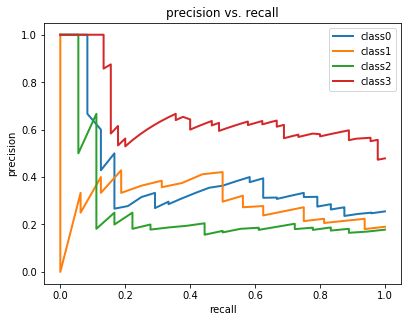

In [190]:
n_class:4

clf:OneVsRestClassifier(RandomForestClassifier[`n_estimators pykw 500;`random_state pykw 0])
clf[`:fit][xtr;y_train]

y_score:clf[`:predict_proba][Xtest]
ypredict:clf[`:predict][Xtest]


{prc:precision_recall_curve[(y_test`)[;x];(y_score`)[;x]]`;
 plt[`:plot][prc[1];prc[0];`lw pykw 2;`label pykw "class",string x];}each til n_class;

plt[`:xlabel][`recall];
plt[`:ylabel][`precision];
plt[`:legend][`loc pykw `best];
plt[`:title]["precision vs. recall"];
plt[`:show][];

## Binary labels

In [207]:
pk_binary:time_peak_clean

In [227]:
pk_binary[`target]:{$[x>18;1;0]}each pk_binary[`delta_peak]

In [228]:
Xtrain:flip (select from pk_binary where split=`TRAIN)[cols_to_include]
ytrain:exec target from pk_binary where split=`TRAIN
Xtest:flip (select from  pk_binary where split=`TEST)[cols_to_include]
ytest:exec target from pk_binary where split=`TEST

In [229]:
xtr:(Xtrain)[(til count[Xtrain]) except where 0<>{count where x=neg 0w}each Xtrain]
ytr:ytrain[(til count[Xtrain]) except where 0<>{count where x=neg 0w}each Xtrain]

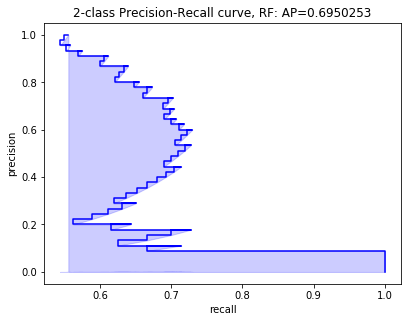

In [232]:
/add step function to graph to smoothen it out
XGBClassifier:.p.import[`xgboost]`:XGBClassifier

clfX: XGBClassifier[]
clfX[`:fit][np[`:array]xtr;ytr];
ypredict:clfX[`:predict][Xtest];
yscores:(clfX[`:predict_proba][Xtest]`)[;1];

prcX:precision_recall_curve[ytest;yscores]`;

average_precision:average_precision_score[ytest;yscores]`;
plt[`:step][prcX[0];prcX[1]; `color pykw `b;
         `where pykw `post];
plt[`:fill_between][prcX[0];prcX[1];`alpha pykw 0.2;`color pykw `b];

plt[`:xlabel][`recall];
plt[`:ylabel][`precision];
plt[`:title]["2-class Precision-Recall curve, RF: AP=",string average_precision];
plt[`:show][];